In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings("ignore")

hechos = pd.read_parquet('../archivos/datos_limpios/hechos.parquet')
victimas = pd.read_parquet('../archivos/datos_limpios/victimas.parquet')

In [99]:
hechos.head(2)

,Id_hecho,N_victimas,Fecha,Año,Mes,Hora,Calle,Cruce,Comuna,Longitud,Latitud,Victima,Acusado
0,2016-0001,1,2016-01-01,2016,1,4.0,PIEDRA BUENA AV.,1,8,-58.475340,-34.687570,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,1.0,"PAZ, GRAL. AV.",1,9,-58.508775,-34.669777,AUTO,PASAJEROS


In [100]:
victimas.head(2)

,Id_hecho,Rol,Victima,Sexo,Edad,Fecha_fallecimiento,Año,Mes,Dia
0,2016-0001,CONDUCTOR,MOTO,MASCULINO,19.0,2016-01-01,2016,1,1
1,2016-0002,CONDUCTOR,AUTO,MASCULINO,70.0,2016-01-02,2016,1,2


In [101]:
hechos.describe(include='all')

,Id_hecho,N_victimas,Fecha,Año,Mes,Hora,Calle,Cruce,Comuna,Longitud,Latitud,Victima,Acusado
count,695,695.000000,695,695.000000,695.000000,694.000000,695,695.000000,695.000000,684.000000,684.000000,686,673
unique,695,NaN,NaN,NaN,NaN,NaN,278,NaN,NaN,NaN,NaN,9,9
top,2021-0097,NaN,NaN,NaN,NaN,NaN,"PAZ, GRAL. AV.",NaN,NaN,NaN,NaN,MOTO,AUTO
freq,1,NaN,NaN,NaN,NaN,NaN,57,NaN,NaN,NaN,NaN,295,204
mean,NaN,1.030216,2018-09-15 04:10:42.302158336,2018.191367,6.686331,11.645533,NaN,0.755396,7.435971,-58.441545,-34.619632,NaN,NaN
min,NaN,1.000000,2016-01-01 00:00:00,2016.000000,1.000000,0.000000,NaN,0.000000,0.000000,-58.529942,-34.705250,NaN,NaN
25%,NaN,1.000000,2017-04-03 00:00:00,2017.000000,4.000000,6.000000,NaN,1.000000,4.000000,-58.476218,-34.643689,NaN,NaN
50%,NaN,1.000000,2018-07-14 00:00:00,2018.000000,7.000000,11.000000,NaN,1.000000,8.000000,-58.444513,-34.622928,NaN,NaN
75%,NaN,1.000000,2020-01-04 12:00:00,2020.000000,10.000000,17.000000,NaN,1.000000,11.000000,-58.401841,-34.596799,NaN,NaN
max,NaN,3.000000,2021-12-30 00:00:00,2021.000000,12.000000,23.000000,NaN,1.000000,15.000000,-58.356082,-34.534654,NaN,NaN


**Verifico que los valores N_victimas sean del tipo int para poder realizar una suma por cada año**

In [102]:
hechos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 695 entries, 0 to 695
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Id_hecho    695 non-null    object        
 1   N_victimas  695 non-null    int64         
 2   Fecha       695 non-null    datetime64[ns]
 3   Año         695 non-null    int64         
 4   Mes         695 non-null    int64         
 5   Hora        694 non-null    float64       
 6   Calle       695 non-null    object        
 7   Cruce       695 non-null    int64         
 8   Comuna      695 non-null    int64         
 9   Longitud    684 non-null    float64       
 10  Latitud     684 non-null    float64       
 11  Victima     686 non-null    object        
 12  Acusado     673 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(5), object(4)
memory usage: 76.0+ KB


Comienzo primero verificando las calles en las que los accidentes son frecuentes

<function matplotlib.pyplot.show(close=None, block=None)>

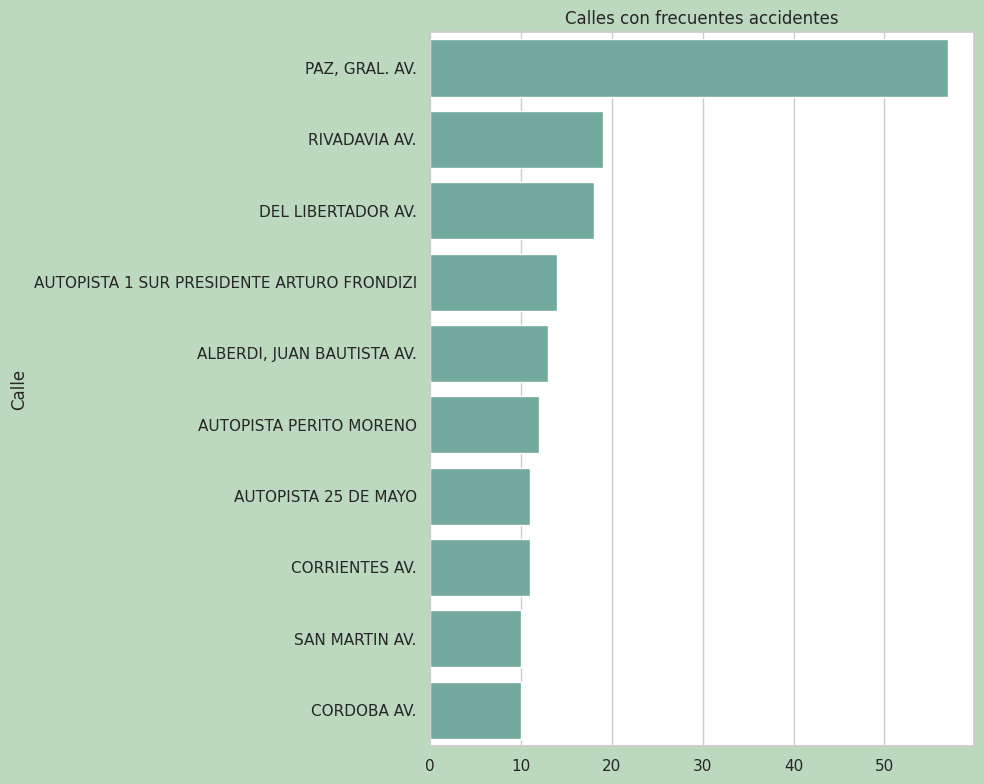

In [103]:
#usamos solo la columna 'Calle'
calles = hechos['Calle']
#realizamos un conteo de la cantidad de ocasiones en las que los accidentes ocurrieron en una determinada calle
calles = calles.value_counts()
#al ser mas de 200 resultados realizamos un filtrado para ver aquellas que tienen mayor cantidad de accidentes (en este caso + o igual a 10)
calles = calles[calles>=10]

figura = plt.figure(figsize=(10,8))
figura.patch.set_facecolor('#bcd8bf')
plt.title('Calles con frecuentes accidentes')
sns.set_theme(style="darkgrid")
sns.barplot(y=calles.keys(), x=calles.values, color='#69b3a2')
plt.tight_layout()
plt.show

con este grafico ya tengo una idea en que calles son frecuentes los accidentes

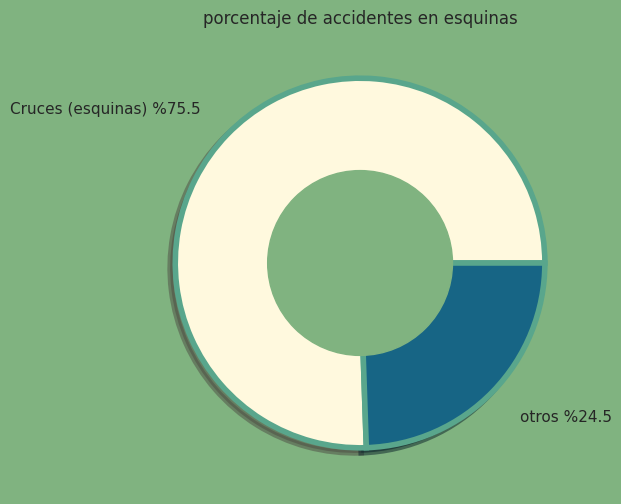

In [104]:
cruces = hechos[hechos['Cruce']==1].shape[0]
otros = hechos[hechos['Cruce']==0].shape[0]
total = hechos['Cruce'].shape[0]

porcentaje_cruces = cruces*100/total
porcentaje_otros = otros*100/total
porcentaje_cruces = "{:.1f}".format(porcentaje_cruces)
porcentaje_otros = "{:.1f}".format(porcentaje_otros)

nombre_partes = [f'Cruces (esquinas) %{porcentaje_cruces}', f'otros %{porcentaje_otros}']
total = [cruces,otros]

figura = plt.figure(figsize=(10,6))
figura.patch.set_facecolor('#80b380')

circulo = plt.Circle( (0,0), 0.5, color='#80b380')
 
plt.title('porcentaje de accidentes en esquinas')
plt.pie(total, labels=nombre_partes,labeldistance=1.2,shadow=True, wedgeprops = {'linewidth':4,'edgecolor':'#59a68c'},colors=['#fff9de','#176585'])
p=plt.gcf()
p.gca().add_artist(circulo)
plt.show()

Mayoria de siniestros viales en las esquinas. esto puede ser interesante para chequear en conjunto despues con un mapa y ver cual o cuales esquinas son las que tienen mayor concentracion de accidentes

In [105]:
comunas = hechos[['N_victimas','Comuna','Latitud','Longitud']]
print(comunas['Comuna'].unique())
print()
print(comunas[comunas['Comuna']==0])

[ 8  9  1 11 15  4  7 12  3 13 14 10  6  2  5  0]

     N_victimas  Comuna  Latitud  Longitud
139           1       0      NaN       NaN


elimino aquellas filas que no contienen coordenadas

In [106]:
comunas = comunas.dropna()

quiero ver la concentracion de puntos en las comunas

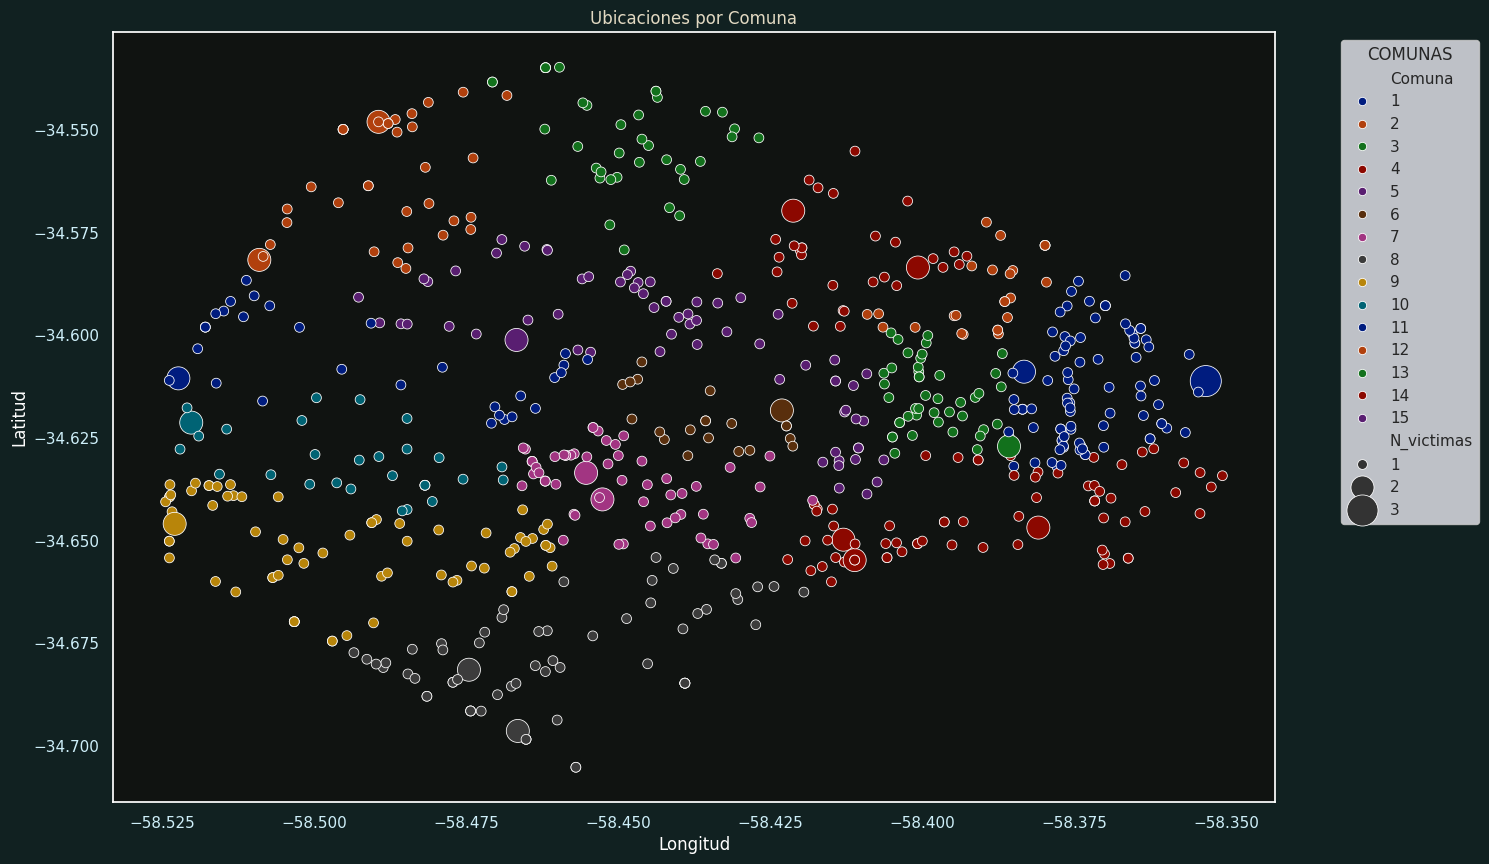

In [107]:
# Crear el gráfico
figura = plt.figure(figsize=(15, 10))
figura.patch.set_color('#112121')

sns.set_theme(style="dark")
scatter = sns.scatterplot(x='Longitud', y='Latitud', hue='Comuna', palette='dark', data=comunas, size="N_victimas", sizes=(50, 500))
scatter.set_facecolor('#101311')

# Añadir título y etiquetas
plt.title('Ubicaciones por Comuna', color='#e2d9c2')

# Mostrar el gráfico
plt.legend(title='COMUNAS', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0,ha='right', color='#ceeff9')
plt.yticks(color='#ceeff9')
plt.xlabel('Longitud', color='white')
plt.ylabel('Latitud', color='white')
plt.show()

chequeando detenidamente se puede ver una concentracion en la zona este(derecha), se buscaran estos puntos en un mapa para verificar las zonas

---

quiero ir verificando por diferentes franjas de tiempo: anual, mensual, diario y horario

In [108]:
victimas_por_año = hechos[['N_victimas','Año']]
victimas_por_año = victimas_por_año.groupby('Año').sum().reset_index()
victimas_por_año.head()

,Año,N_victimas
0,2016,145
1,2017,140
2,2018,149
3,2019,104
4,2020,81


+ Grafico la cantidad de muertes por año, chequeo si en 2019 y 2020 hay un descenso, debido al covid y las restricciones de circulacion

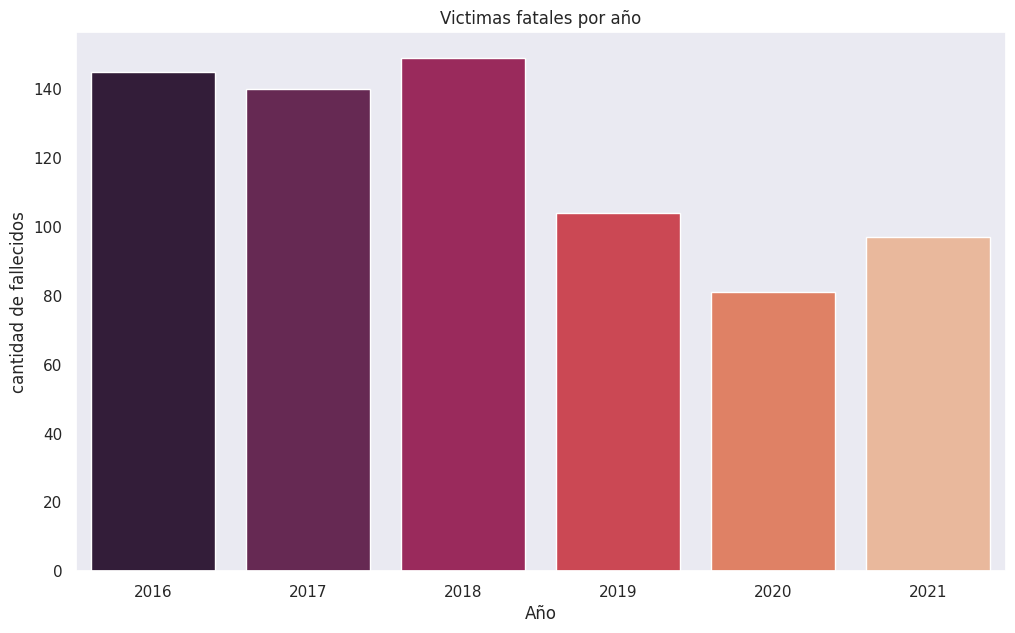

In [109]:
plt.figure(figsize=(12, 7))
plt.title('Victimas fatales por año')
plt.ylabel('cantidad de fallecidos')
ax = sns.barplot(x='Año', y='N_victimas', data=victimas_por_año, palette='rocket')

In [110]:
victimas_por_mes = hechos[['N_victimas','Año','Mes']]
victimas_por_mes = victimas_por_mes.groupby(['Año','Mes']).sum().reset_index()
victimas_por_mes

,Año,Mes,N_victimas
0,2016,1,8
1,2016,2,12
2,2016,3,13
3,2016,4,11
4,2016,5,7
...,...,...,...
67,2021,8,9
68,2021,9,4
69,2021,10,5
70,2021,11,8


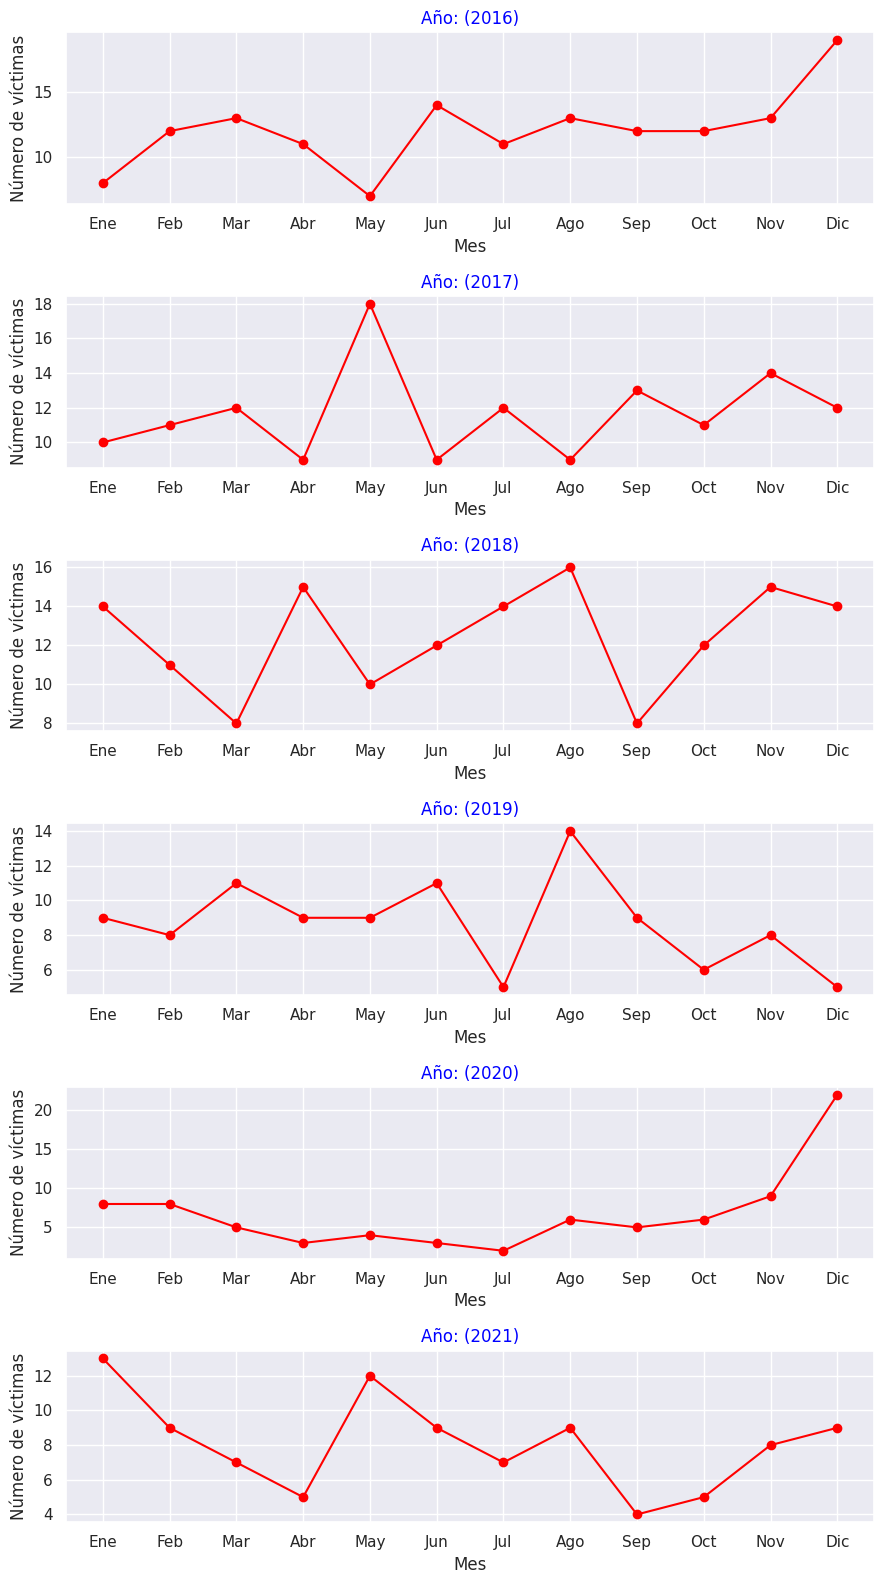

In [111]:
anios = victimas_por_mes['Año'].unique()  # Puedes agregar más años a esta lista
sns.set_theme(style='darkgrid')
# Crear una figura con subplots para cada año
fig, axes = plt.subplots(len(anios), 1, figsize=(9, 16))  # Ajustar el tamaño según sea necesario

# Recorrer cada año y crear un gráfico lineplot en su subplot correspondiente
for i, anio in enumerate(anios):
    datos_anio = victimas_por_mes[victimas_por_mes["Año"] == anio]  # Filtrar datos por año
    ax = axes[i]  # Obtener el subplot actual

    # Crear el lineplot
    ax.plot(datos_anio["Mes"], datos_anio["N_victimas"], label=str(anio), marker='o', color='red')

    # Se agregan algunas etiquetas para identificar los puntos, los X e Y y el titulo
    ax.set_title(f"Año: ({anio})", color='blue')
    ax.set_xlabel("Mes")
    ax.set_ylabel("Número de víctimas")
    #cantidad de divisiones que quiero tener en Mes
    ax.set_xticks(range(1, 13))
    #etiquetas en las divisiones con los nombres de los meses para mayor comprension
    ax.set_xticklabels(["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"])
    ax.grid(True)

# Ajustar el layout de los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

+ un dato de gran relevancia es el numero de victimas por mes que supera a todo el resto en el año 2020, cuando se vuelve a disparar la cantidad de muertes en diciembre, dando el numero de victimas fatales mas grande dadas en un mes.
+ por otro lado, a excepcion del 2018 marzo y abril suelen tener una reduccion de accidentes

In [112]:
victimas_por_dia = hechos[['N_victimas','Fecha','Año']]
victimas_por_dia['Fecha'] = victimas_por_dia['Fecha'].dt.day_name()
victimas_por_dia.rename(columns={'Fecha':'Dia'},inplace=True)
victimas_por_dia = victimas_por_dia.groupby(['Año','Dia']).sum().reset_index()

In [113]:
#utilizamos un diccionario para llamar en el replace y hacer la traduccion de los dias al español
dias_ingles_espanol = {
    'Monday': 'Lunes',
    'Tuesday': 'Martes',
    'Wednesday': 'Miércoles',
    'Thursday': 'Jueves',
    'Friday': 'Viernes',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}
victimas_por_dia['Dia'] = victimas_por_dia['Dia'].replace(dias_ingles_espanol)
victimas_por_dia.head(7)

,Año,Dia,N_victimas
0,2016,Viernes,18
1,2016,Lunes,22
2,2016,Sábado,22
3,2016,Domingo,30
4,2016,Jueves,10
5,2016,Martes,16
6,2016,Miércoles,27


In [114]:
dias_orden = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
victimas_por_dia['Dia'] = pd.Categorical(victimas_por_dia['Dia'], categories=dias_orden, ordered=True)
victimas_por_dia = victimas_por_dia.sort_values(by=['Dia','Año']).reset_index(drop=True)

en este caso quiero utilizar barras agrupadas para chequear si existe algun patron entre los dias de semana y los fines de semana de cada año (2016-2021)

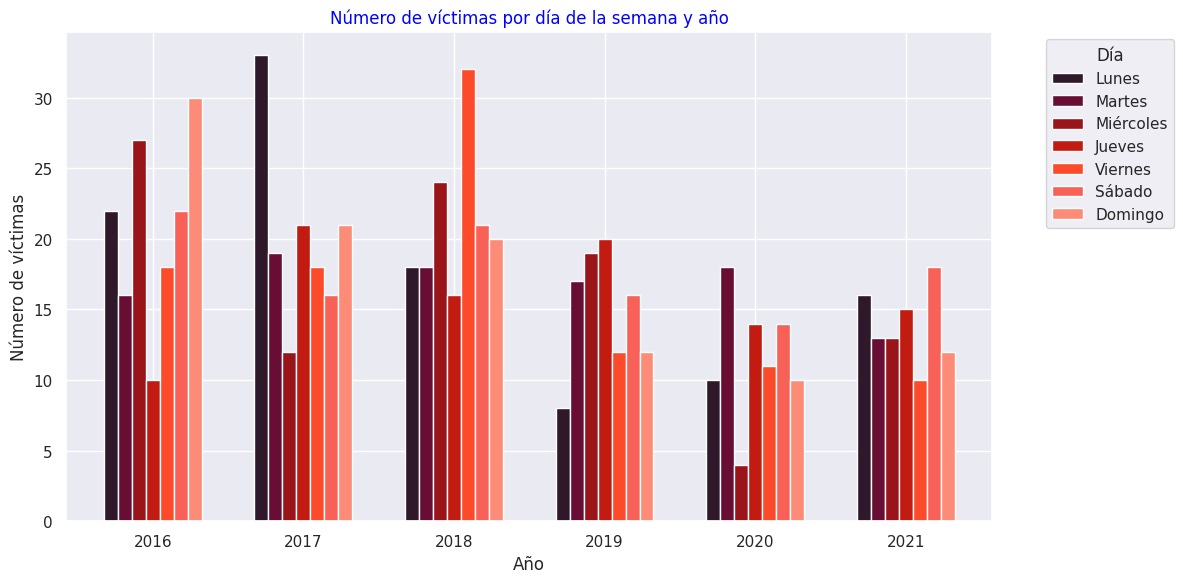

In [115]:
pivot_table = victimas_por_dia.pivot(index='Año', columns='Dia', values='N_victimas')

colors = ['#30182b', '#680e34', '#9a151a', '#c21b12', '#fc4b2a', '#f76157', '#fc8c77']

pivot_table.plot(kind='bar', figsize=(12, 6), width=0.65,color=colors)
plt.title('Número de víctimas por día de la semana y año', color='blue')
plt.xlabel('Año')
plt.ylabel('Número de víctimas')
plt.xticks(rotation=0)

plt.legend(title='Día', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

queria ver si habia un patron que se repita entre los fines de semana y los dias habiles pero no encontre entre el conjunto de años constancia de estos

In [116]:
total_dias = victimas_por_dia[['Dia', 'N_victimas']]
total_dias = total_dias.groupby('Dia').sum().reset_index()

Busco en el general de los dias de semana para ver si encuentro alguna diferencia significativa con las victimas

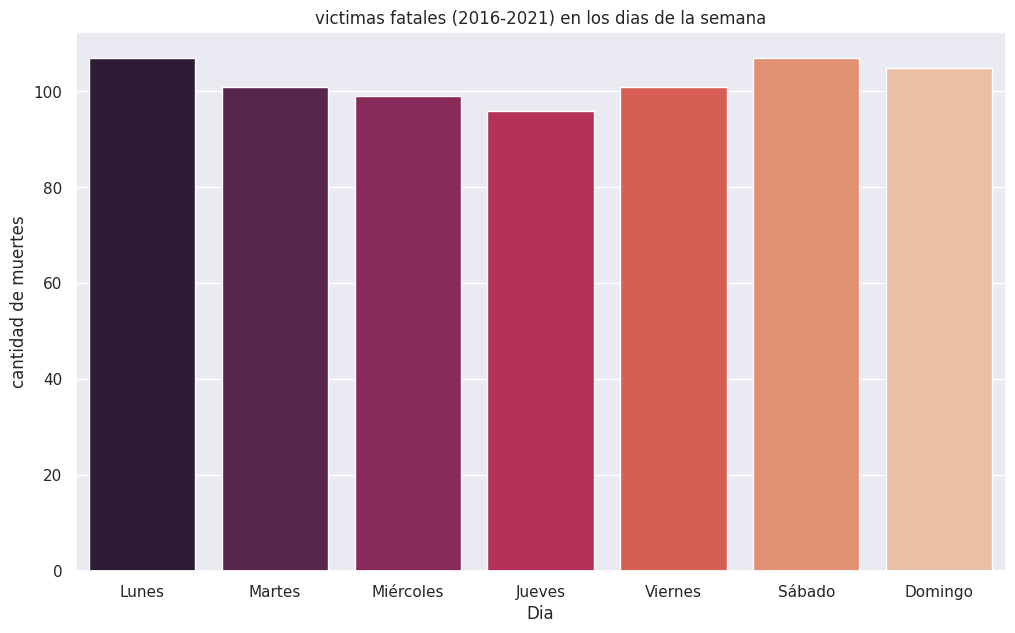

In [117]:
plt.figure(figsize=(12, 7))
plt.title('victimas fatales (2016-2021) en los dias de la semana')
plt.ylabel('cantidad de muertes')
ax = sns.barplot(x='Dia', y='N_victimas', data=total_dias, palette='rocket')

No encuentro un cambio drastico o significativamente relevante entre los dias

**¿y en que horarios suele ocurrir los accidentes en los dias de la semana?**

In [118]:
dias_hora = hechos[['Hora','Fecha']]
dias_hora['Fecha'] = dias_hora['Fecha'].dt.day_name()
dias_hora.rename(columns={'Fecha':'Dia'},inplace=True)
dias_hora['Dia'] = dias_hora['Dia'].replace(dias_ingles_espanol)

In [119]:
dias_orden = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
dias_hora['Dia'] = pd.Categorical(dias_hora['Dia'], categories=dias_orden, ordered=True)
dias_hora = dias_hora.sort_values(by=['Dia']).reset_index(drop=True)

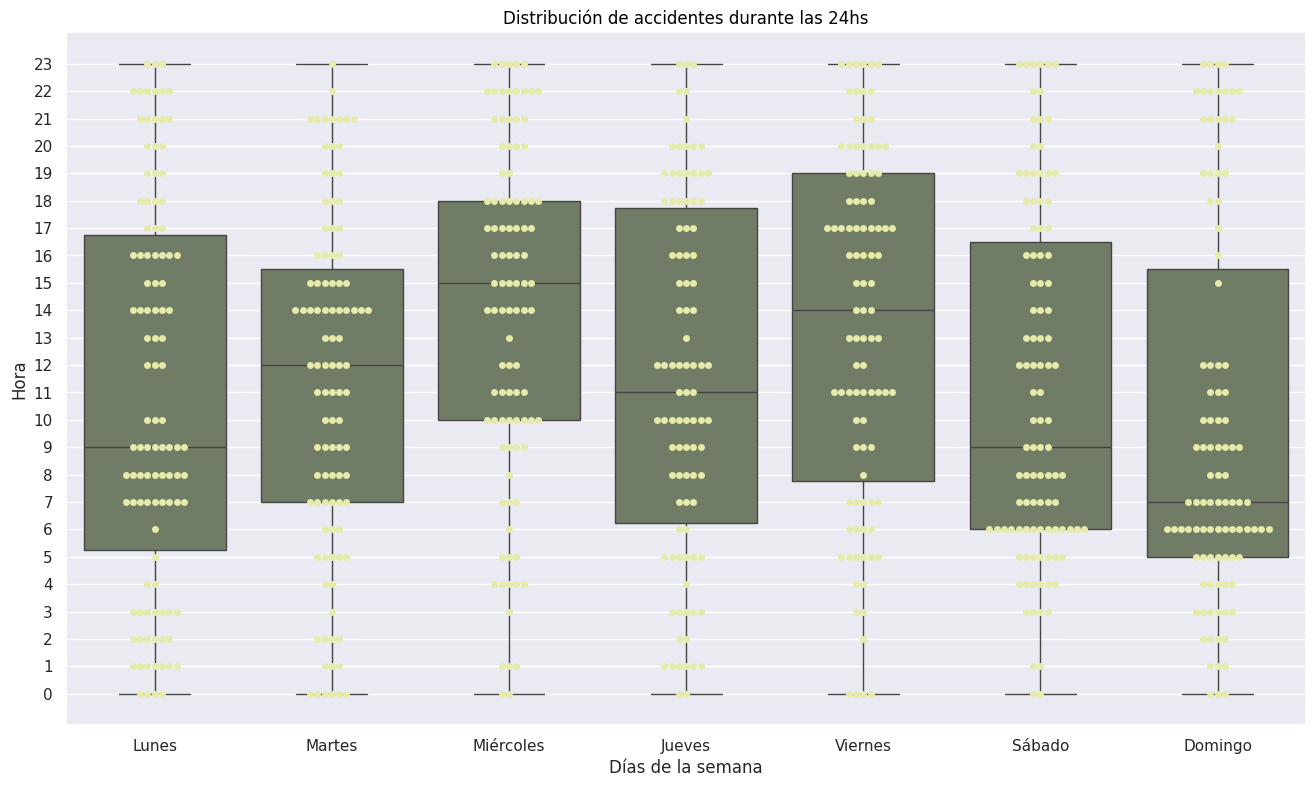

In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear gráfico de violín
plt.figure(figsize=(16, 9))
sns.boxplot(x='Dia', y='Hora', data=dias_hora, color='#718063')

# Agregar los puntos
sns.swarmplot(x='Dia',y='Hora', data=dias_hora, color='#e6eba9')

# Personalizar el gráfico
plt.title('Distribución de accidentes durante las 24hs', color='black')
plt.xlabel('Días de la semana')
plt.ylabel('Hora')
plt.yticks(range(24))

# Mostrar el gráfico
plt.show()

al fin! gracias al grafico de cajas y bigotes, junto con el grafico de enjambre puedo visualizar que hay un grupo grande de accidentes alrededor de las 5hs hasta las 18hs
+ se grafica con el color: #718063 en los puntos para poder diferenciar en contraste (con el color: #e6eba9) la acumulacion en el grafico de caja y bigotes

Ahora quiero realizar una comparativa entre los moviles que usaban tanto las victimas como los acusados

In [121]:
movil_victima = hechos['Victima'].value_counts().reset_index().rename(columns={'Victima':'Movil','count':'Victimas'})
movil_acusado = hechos['Acusado'].value_counts().reset_index().rename(columns={'Acusado':'Movil','count':'Acusados'})
moviles = movil_victima.merge(movil_acusado, on='Movil',how='outer')
moviles = moviles.fillna(0)

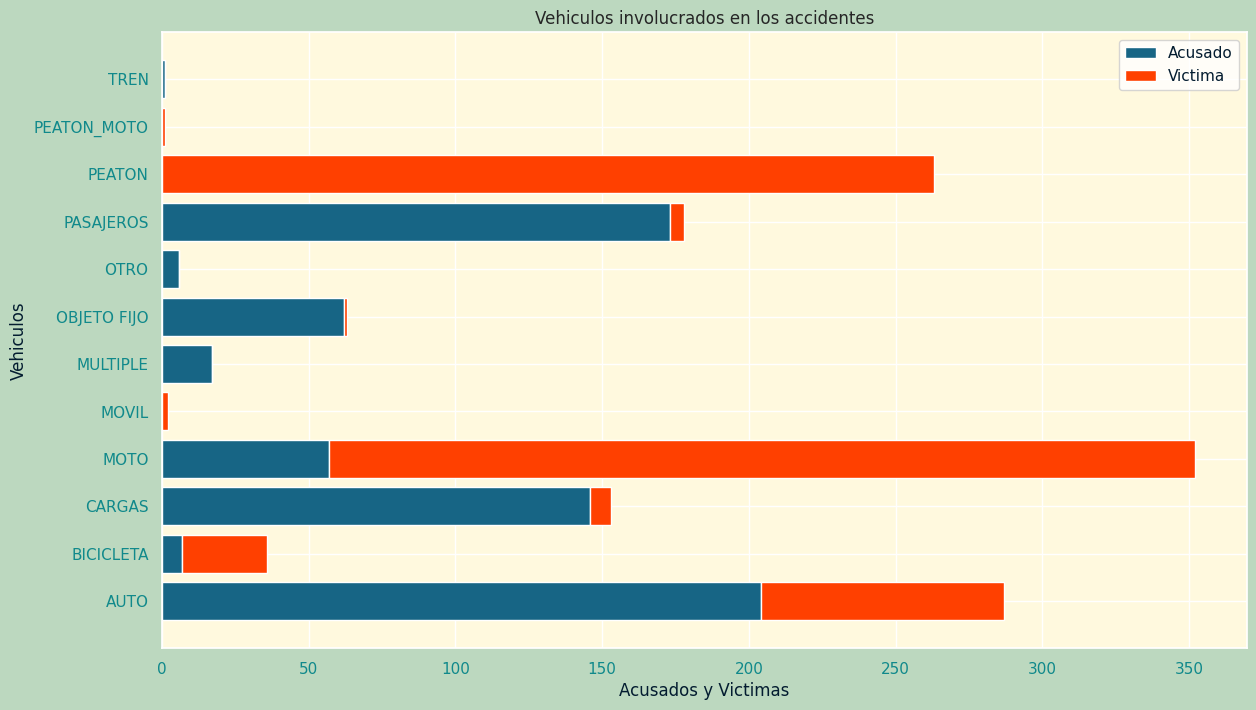

In [122]:
fig, ax = plt.subplots(figsize=(14,8))

sns.set_theme(style='whitegrid')
plt.barh(moviles['Movil'],moviles['Acusados'],color='#176585',label='Acusado')
plt.barh(moviles['Movil'],moviles['Victimas'],color='#ff4000',left=moviles['Acusados'],label='Victima')

fig.set_facecolor('#bcd8bf')
ax.set_facecolor('#fff9de')
ax.set_title('Vehiculos involucrados en los accidentes')
ax.set_ylabel('Vehiculos', color='#031c30')
ax.set_xlabel('Acusados y Victimas',color='#031c30')
ax.tick_params(labelcolor='#10898b')
legend = ax.legend()
for text in legend.get_texts():
    text.set_color('#031c30')

plt.show()


*me llama la atencion la cantidad de acusados que hay siendo pasajeros, tengo entendido por el diccionario de datos que son personas que estan en el interior de un transporte publico y/o omnibus de largas distancias

datos relevantes:
+ mayor cantidad de victimas-> peatones y motociclistas
+ acusados con mayor frecuencia: conductores de autos, pasajeros y choferes de cargas

**y una de las ultimas cosas que quiero graficar es una separacion entre generos y las edades de estos**

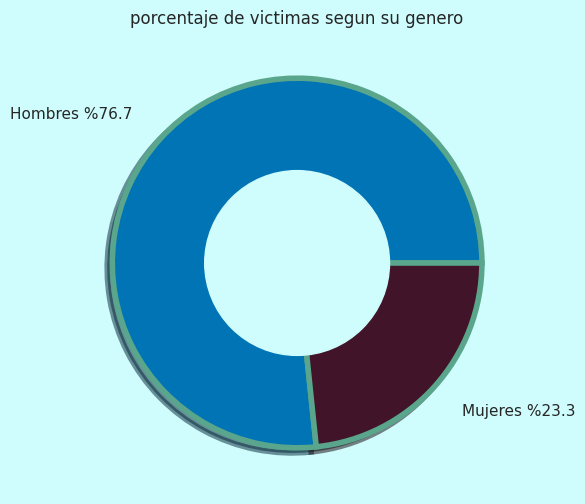

In [123]:
victimas_clean = victimas[victimas['Sexo'].notna()]
hombres = victimas_clean[victimas_clean['Sexo']=='MASCULINO'].shape[0]
mujeres = victimas_clean[victimas_clean['Sexo']=='FEMENINO'].shape[0]
total = victimas_clean['Sexo'].shape[0]

porcentaje_hombres = hombres*100/total
porcentaje_hombres = "{:.1f}".format(porcentaje_hombres)
porcentaje_mujeres = mujeres*100/total
porcentaje_mujeres = "{:.1f}".format(porcentaje_mujeres)

nombre_partes = [f'Hombres %{porcentaje_hombres}', f'Mujeres %{porcentaje_mujeres}']
total = [hombres,mujeres]

figura = plt.figure(figsize=(10,6))
figura.patch.set_facecolor('#cffcfc')

circulo = plt.Circle( (0,0), 0.5, color='#cffcfc')

plt.title('porcentaje de victimas segun su genero')
plt.pie(total, labels=nombre_partes,labeldistance=1.2,shadow=True, wedgeprops = {'linewidth':4,'edgecolor':'#59a68c'},colors=['#0074b4','#42142a'])
p=plt.gcf()
p.gca().add_artist(circulo)
plt.show()

In [124]:
victimas_mujer = victimas[victimas['Sexo']=='FEMENINO']
victimas_hombre = victimas[victimas['Sexo']=='MASCULINO']

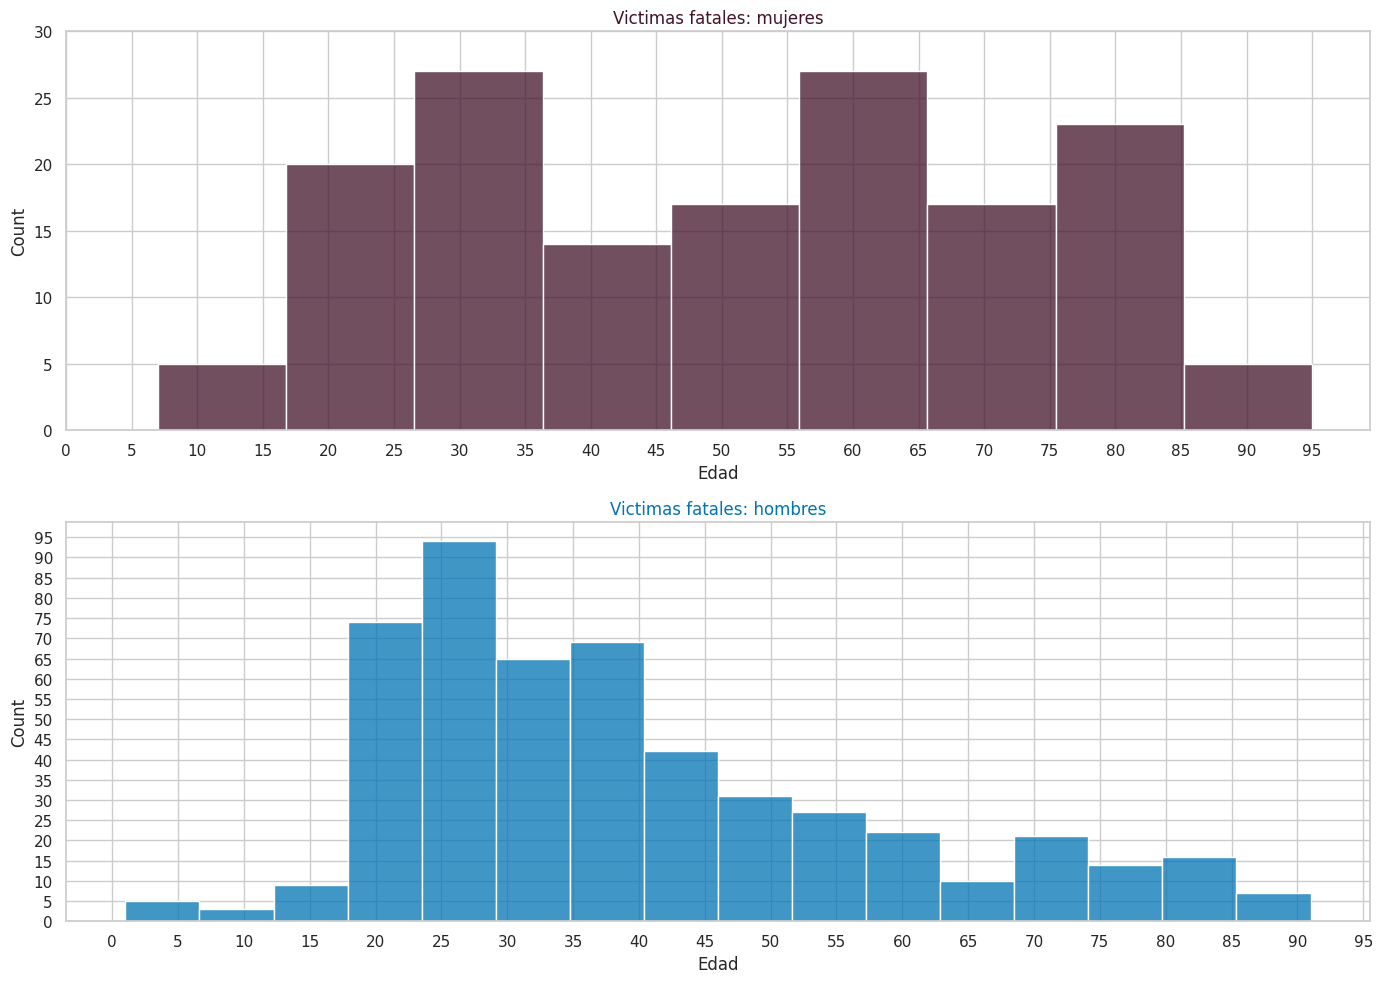

In [125]:
fig,axs = plt.subplots(2, figsize=(14,10))
sns.histplot(data=victimas_mujer,x='Edad', ax = axs[0], color='#42142a')
sns.histplot(data=victimas_hombre,x='Edad',ax = axs[1], color='#0074b4')

#de acuerdo a lo que voy viendo voy modificando las divisiones en el eje X e Y, tanto en hombres como mujeres
axs[0].set_title('Victimas fatales: mujeres', color='#42142a')
axs[0].set_xticks(range(0,100,5))
axs[0].set_yticks(range(0,31,5))
axs[1].set_title('Victimas fatales: hombres', color='#0074b4')
axs[1].set_xticks(range(0,100,5))
axs[1].set_yticks(range(0,100,5))

plt.tight_layout()
plt.show()

rango de edades de los fallecidos segun el genero
+ en el grafico de las mujeres veo que hay dos cimas, una esta entre los 25 y 35 años y la otra entre los 55 y 65 años
+ la cantidad de muertes en la grafica de los hombres alcanza una cima entre los 20 y 30 años

---

---

---

De acuerdo a lo analizado procedo a unir las dos tablas y quito columnas que no hayan aportado nada al analisis de los siniestros

In [126]:
victimas = victimas.drop(['Victima','Fecha_fallecimiento','Año','Mes','Dia'], axis=1)
siniestros = hechos.merge(victimas,on='Id_hecho',how='outer')

Index(['Id_hecho', 'Rol', 'Victima', 'Sexo', 'Edad', 'Fecha_fallecimiento',
       'Año', 'Mes', 'Dia'],
      dtype='object')


In [128]:
siniestros.head()
siniestros.rename(columns={'':''})

,Id_hecho,N_victimas,Fecha,Año,Mes,Hora,Calle,Cruce,Comuna,Longitud,Latitud,Victima,Acusado,Rol,Sexo,Edad
0,2016-0001,1.0,2016-01-01,2016.0,1.0,4.0,PIEDRA BUENA AV.,1.0,8.0,-58.475340,-34.687570,MOTO,AUTO,CONDUCTOR,MASCULINO,19.0
1,2016-0002,1.0,2016-01-02,2016.0,1.0,1.0,"PAZ, GRAL. AV.",1.0,9.0,-58.508775,-34.669777,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70.0
2,2016-0003,1.0,2016-01-03,2016.0,1.0,7.0,ENTRE RIOS AV.,0.0,1.0,-58.390403,-34.631894,MOTO,AUTO,CONDUCTOR,MASCULINO,30.0
3,2016-0004,1.0,2016-01-10,2016.0,1.0,0.0,LARRAZABAL AV.,1.0,8.0,-58.465039,-34.680930,MOTO,None,CONDUCTOR,MASCULINO,18.0
4,2016-0005,1.0,2016-01-21,2016.0,1.0,5.0,SAN JUAN AV.,1.0,1.0,-58.387183,-34.622466,MOTO,PASAJEROS,CONDUCTOR,MASCULINO,29.0
